In [1]:
import config, parse_midas_data, sample_utils as su, sfs_utils
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict
import random

In [2]:
sample_cohort_map = su.parse_sample_cohort_map()
good_species_list = parse_midas_data.load_pickled_good_species_list()
qp_color_map = {'qp': 'blue', 'non-qp': 'red', 'low-coverage': 'gray'}

In [3]:
# Grab QP samples for all species
cohorts = ['hmp', 'backhed', 'ferretti', 'yassour', 'shao']
samples = {cohort: su.get_sample_names(cohort) for cohort in cohorts}
sample_species_qp_dict = defaultdict(dict)

for species in good_species_list:
    for cohort in cohorts:
        qp_sample_sets = su.load_qp_samples(samples[cohort], species, prev_cohort='all')
        for qp_status in ['qp', 'non-qp', 'low-coverage']:
            for sample in qp_sample_sets[qp_status]:
                sample_species_qp_dict[sample][species] = qp_status

In [4]:
species = good_species_list[1]
print(species)

Bacteroides_vulgatus_57955


In [5]:
samples, sfs_maps = parse_midas_data.parse_within_sample_sfs(species, 
                                                            allowed_variant_types=set(['4D']), 
                                                            prev_cohort='all')

In [6]:
infant_samples = su.get_sample_names('infant')
olm_samples = su.get_sample_names('olm')
infant_samples = [sample for sample in infant_samples if sample not in olm_samples]
desired_samples = [sample for sample in samples if sample in infant_samples]
# random.shuffle(desired_samples)

In [7]:
cohort_count_dict = defaultdict(int)
for sample in desired_samples[:120]:
    cohort_count_dict[sample_cohort_map[sample]] += 1
print(cohort_count_dict) # Cohorts represented in 120 SFSs to be plotted

defaultdict(<class 'int'>, {'backhed': 120})


In [20]:
nonqp_5050_sample = desired_samples[7]
qp_100_sample = desired_samples[24]
qp_90_sample = desired_samples[53]

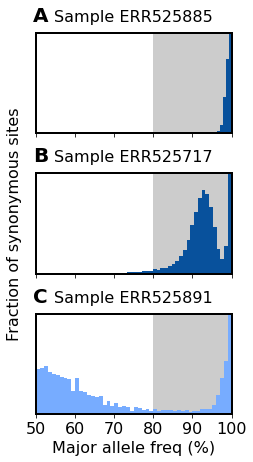

In [51]:
qp_color='#08519c'
nonqp_color='#77acff'
qp_color_map = {'qp': qp_color, 'non-qp': nonqp_color}

fig, ax = plt.subplots(3, 1, figsize=(3.5,7), sharex=True)

i = 0
letter_dict = {0: 'A', 1: 'B', 2: 'C'}
ymin_ymax_dict = {0: [0, 6000], 1: [0, 3000], 2: [0, 3000]}

for sample in [qp_100_sample, qp_90_sample, nonqp_5050_sample]:
    sfs_map = sfs_maps[sample]
    qp_status = sample_species_qp_dict[sample][species]
    color = qp_color_map[qp_status]
    major_freqs = []
    for key in sfs_map.keys():
        D,A = key
        n = sfs_map[key][0]

        alt_freq = A/float(D)
        major_freq = (1-alt_freq) if alt_freq < 0.5 else alt_freq
        major_freqs += ([major_freq]*n)
    
    ymin, ymax = ymin_ymax_dict[i]
    ax[i].hist(major_freqs, bins=50, color=color)
    ax[i].fill_between([0.8,1], [ymin,ymin],[ymax,ymax],color='0.8',zorder=-1)
    for axis in ['top','bottom','left','right']:
        ax[i].spines[axis].set_linewidth(2)
    
    ax[i].set_ylim((ymin, ymax))
    # ax[i].set_title("    Sample %s" % (sample), fontsize=16, loc='left')
    ax[i].text(0.09, 1.12, "Sample %s" % (sample), size=16, transform=ax[i].transAxes)
    ax[i].text(-0.018, 1.12, letter_dict[i], size=20, transform=ax[i].transAxes, weight='bold')
    ax[i].set_yticks([])
    ax[i].set_xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
    ax[i].set_xlim((0.5, 1))
    ax[i].set_xticklabels(['50', '60', '70', '80', '90', '100'], fontsize=16)
    
    i += 1

ax[1].set_ylabel("Fraction of synonymous sites", fontsize=16, labelpad=14)
ax[2].set_xlabel("Major allele freq (%)", fontsize=16)

plt.subplots_adjust(hspace=0.4)
plt.margins(0.2)
plt.show()

fig.savefig('%s/SFS_examples.pdf' % config.analysis_directory)

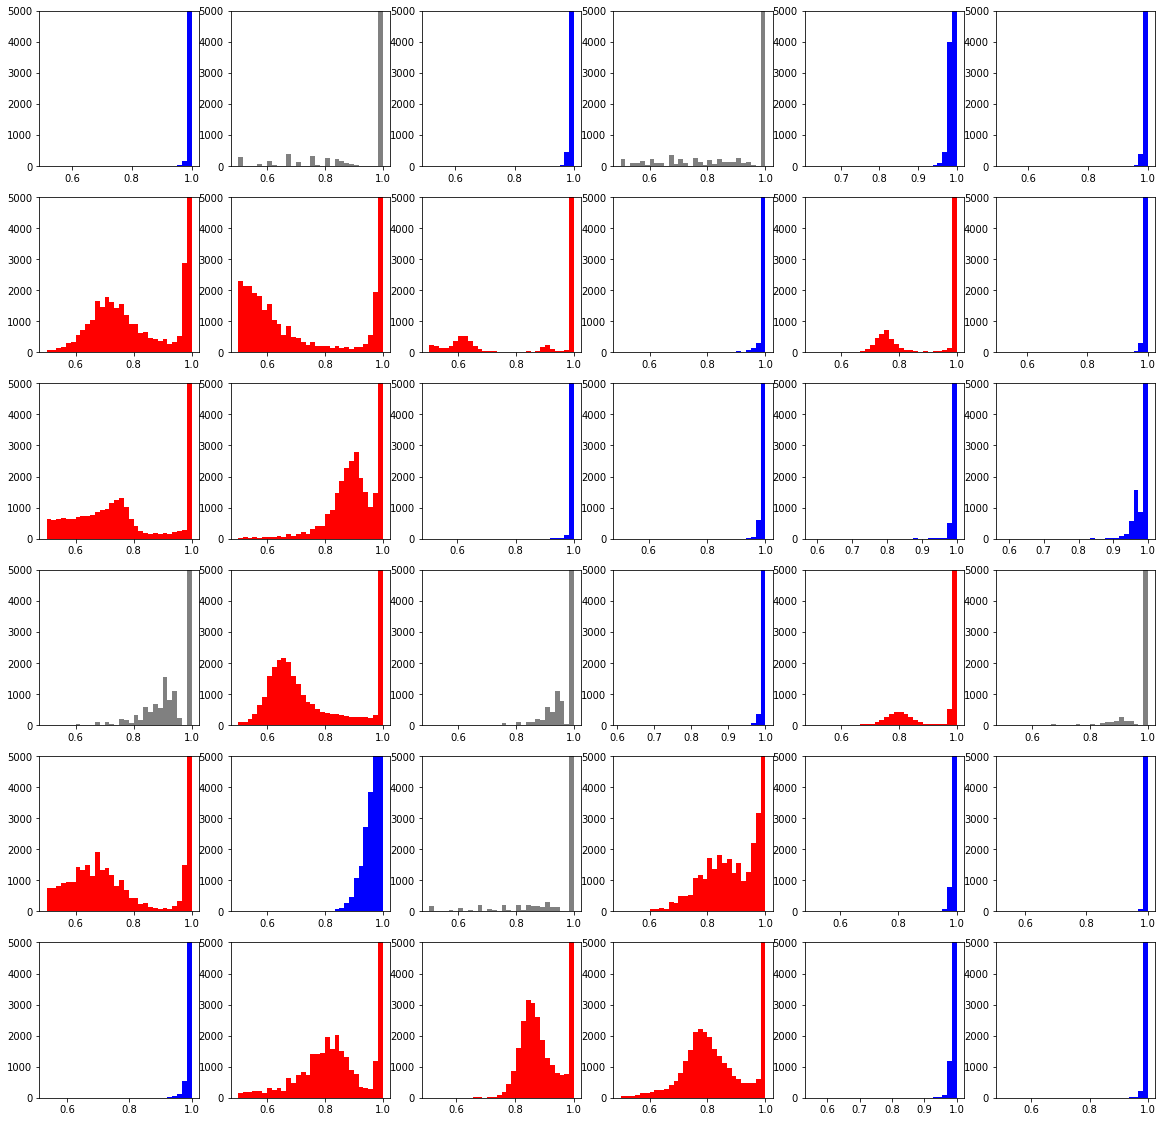

In [8]:
fig, ax = plt.subplots(6, 6, figsize=(20, 20))

x = 0; y = 0
for i in range(36):
    sample = desired_samples[i]
    sfs_map = sfs_maps[sample]
    qp_status = sample_species_qp_dict[sample][species]
    color = qp_color_map[qp_status]
    major_freqs = []
    for key in sfs_map.keys():
        D,A = key
        n = sfs_map[key][0]

        alt_freq = A/float(D)
        major_freq = (1-alt_freq) if alt_freq < 0.5 else alt_freq
        major_freqs += ([major_freq]*n)
    
    ax[x][y].hist(major_freqs, bins=30, color=color)
    ax[x][y].set_ylim((0, 5000))
    x += 1
    if x == 6:
        y += 1
        x = 0

plt.show()

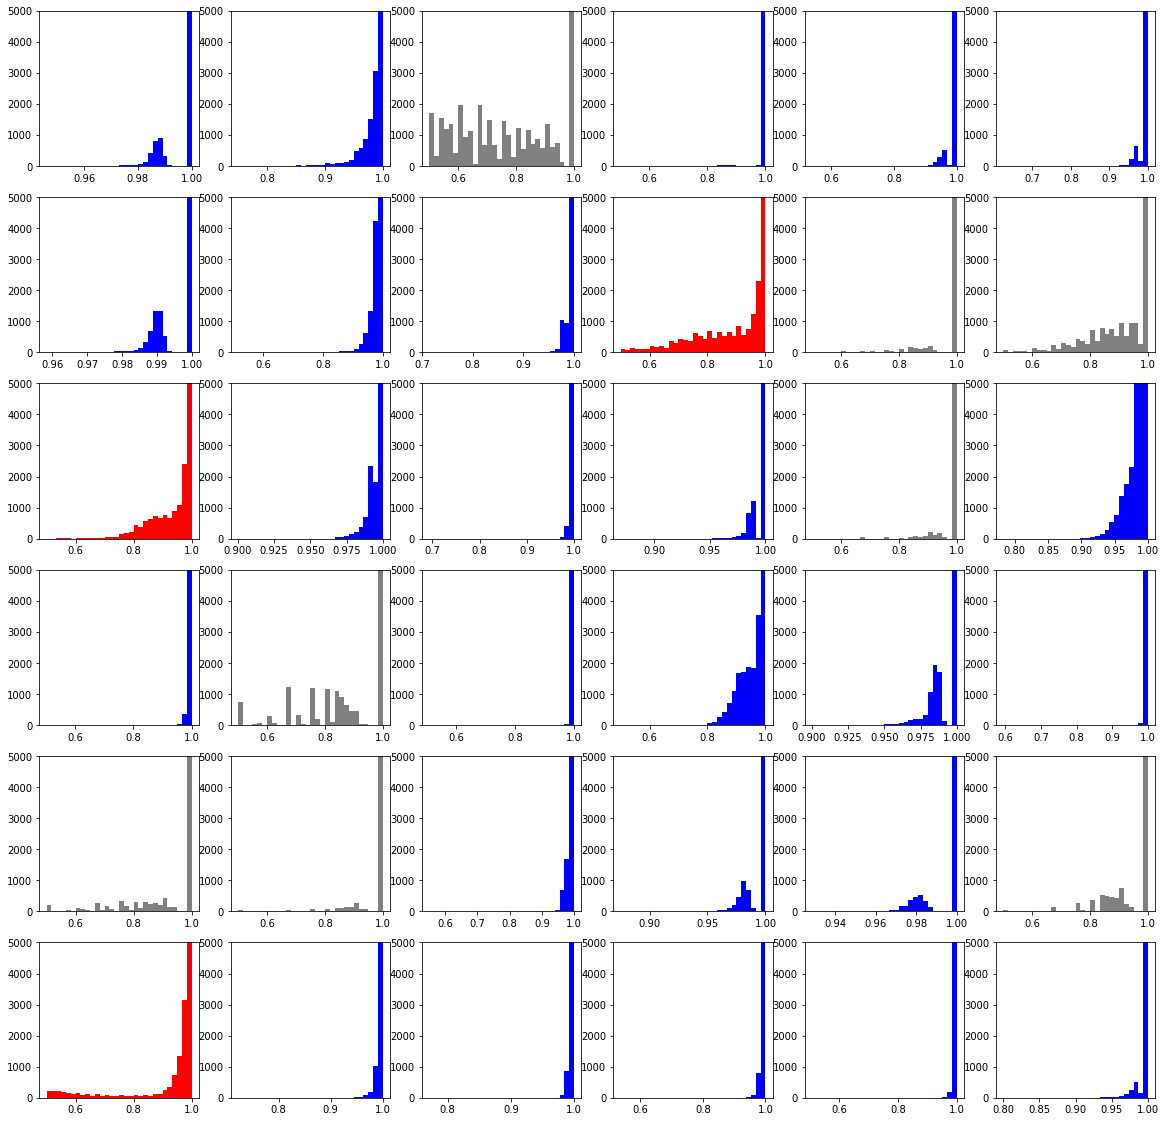

In [67]:
fig, ax = plt.subplots(6, 6, figsize=(20, 20))

x = 0; y = 0
for i in range(36):
    sample = desired_samples[i]
    sfs_map = sfs_maps[sample]
    qp_status = sample_species_qp_dict[sample][species]
    color = qp_color_map[qp_status]
    major_freqs = []
    for key in sfs_map.keys():
        D,A = key
        n = sfs_map[key][0]

        alt_freq = A/float(D)
        major_freq = (1-alt_freq) if alt_freq < 0.5 else alt_freq
        major_freqs += ([major_freq]*n)
    
    ax[x][y].hist(major_freqs, bins=30, color=color)
    ax[x][y].set_ylim((0, 5000))
    x += 1
    if x == 6:
        y += 1
        x = 0

plt.show()

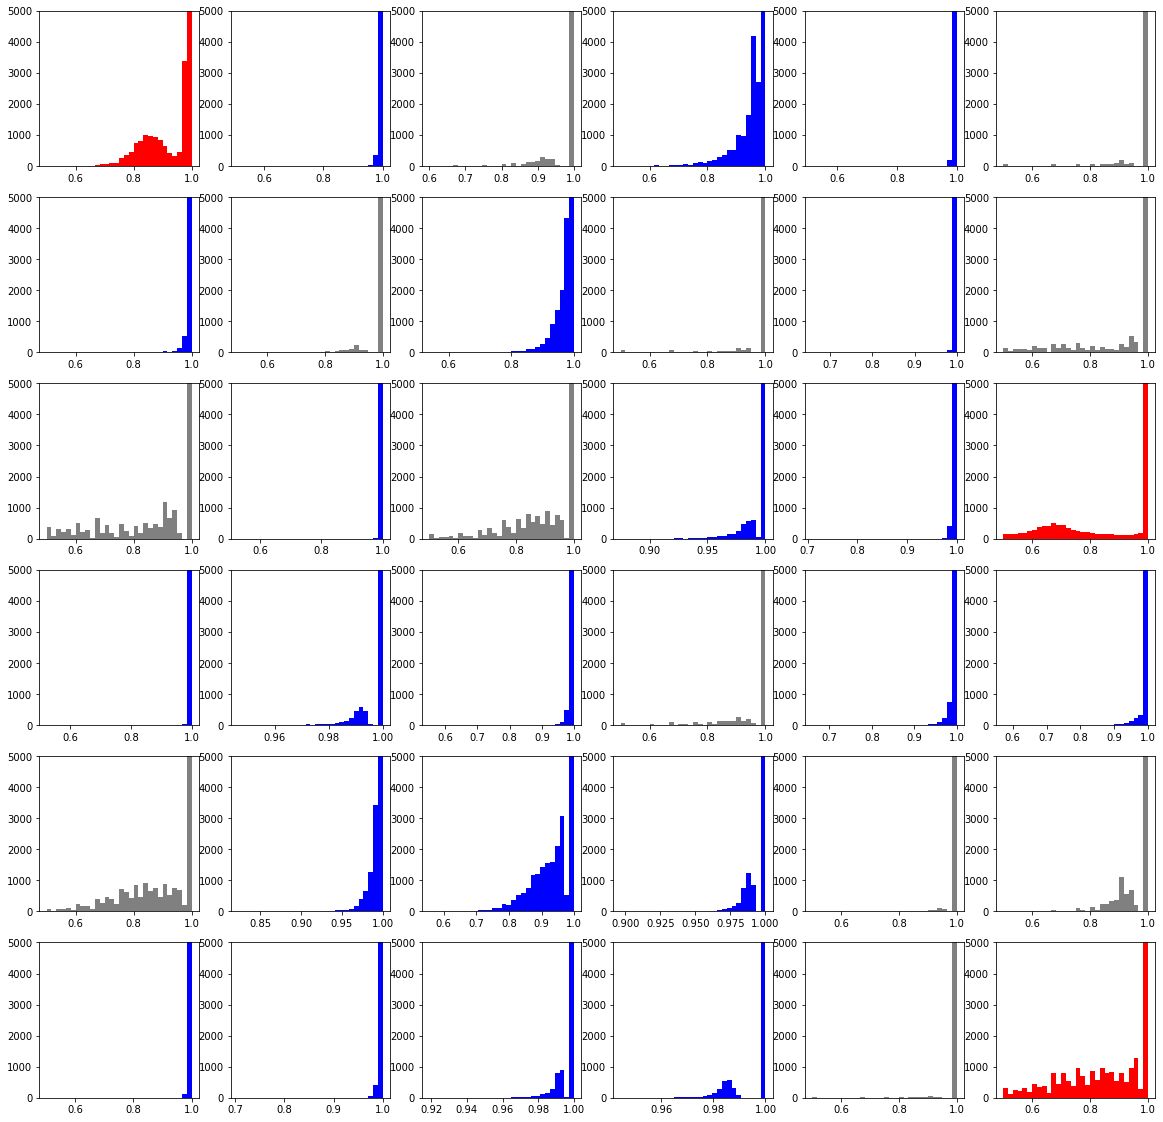

In [68]:
fig, ax = plt.subplots(6, 6, figsize=(20, 20))

x = 0; y = 0
for i in range(36, 36*2):
    sample = desired_samples[i]
    sfs_map = sfs_maps[sample]
    qp_status = sample_species_qp_dict[sample][species]
    color = qp_color_map[qp_status]
    major_freqs = []
    for key in sfs_map.keys():
        D,A = key
        n = sfs_map[key][0]

        alt_freq = A/float(D)
        major_freq = (1-alt_freq) if alt_freq < 0.5 else alt_freq
        major_freqs += ([major_freq]*n)
    
    ax[x][y].hist(major_freqs, bins=30, color=color)
    ax[x][y].set_ylim((0, 5000))
    x += 1
    if x == 6:
        y += 1
        x = 0

plt.show()

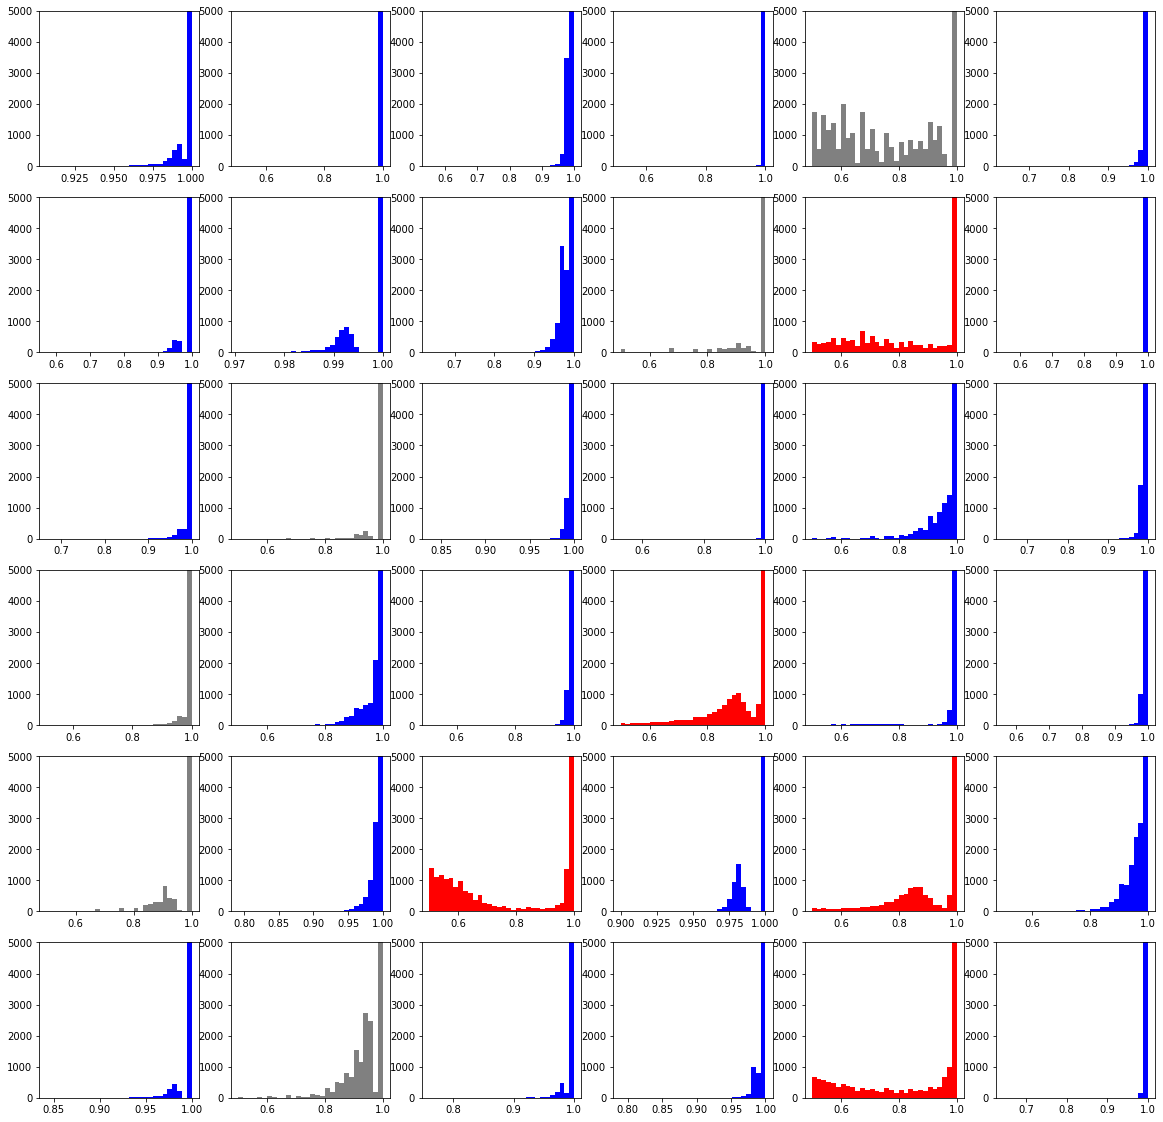

In [69]:
fig, ax = plt.subplots(6, 6, figsize=(20, 20))

x = 0; y = 0
for i in range(36*2, 36*3):
    sample = desired_samples[i]
    sfs_map = sfs_maps[sample]
    qp_status = sample_species_qp_dict[sample][species]
    color = qp_color_map[qp_status]
    major_freqs = []
    for key in sfs_map.keys():
        D,A = key
        n = sfs_map[key][0]

        alt_freq = A/float(D)
        major_freq = (1-alt_freq) if alt_freq < 0.5 else alt_freq
        major_freqs += ([major_freq]*n)
    
    ax[x][y].hist(major_freqs, bins=30, color=color)
    ax[x][y].set_ylim((0, 5000))
    x += 1
    if x == 6:
        y += 1
        x = 0

plt.show()

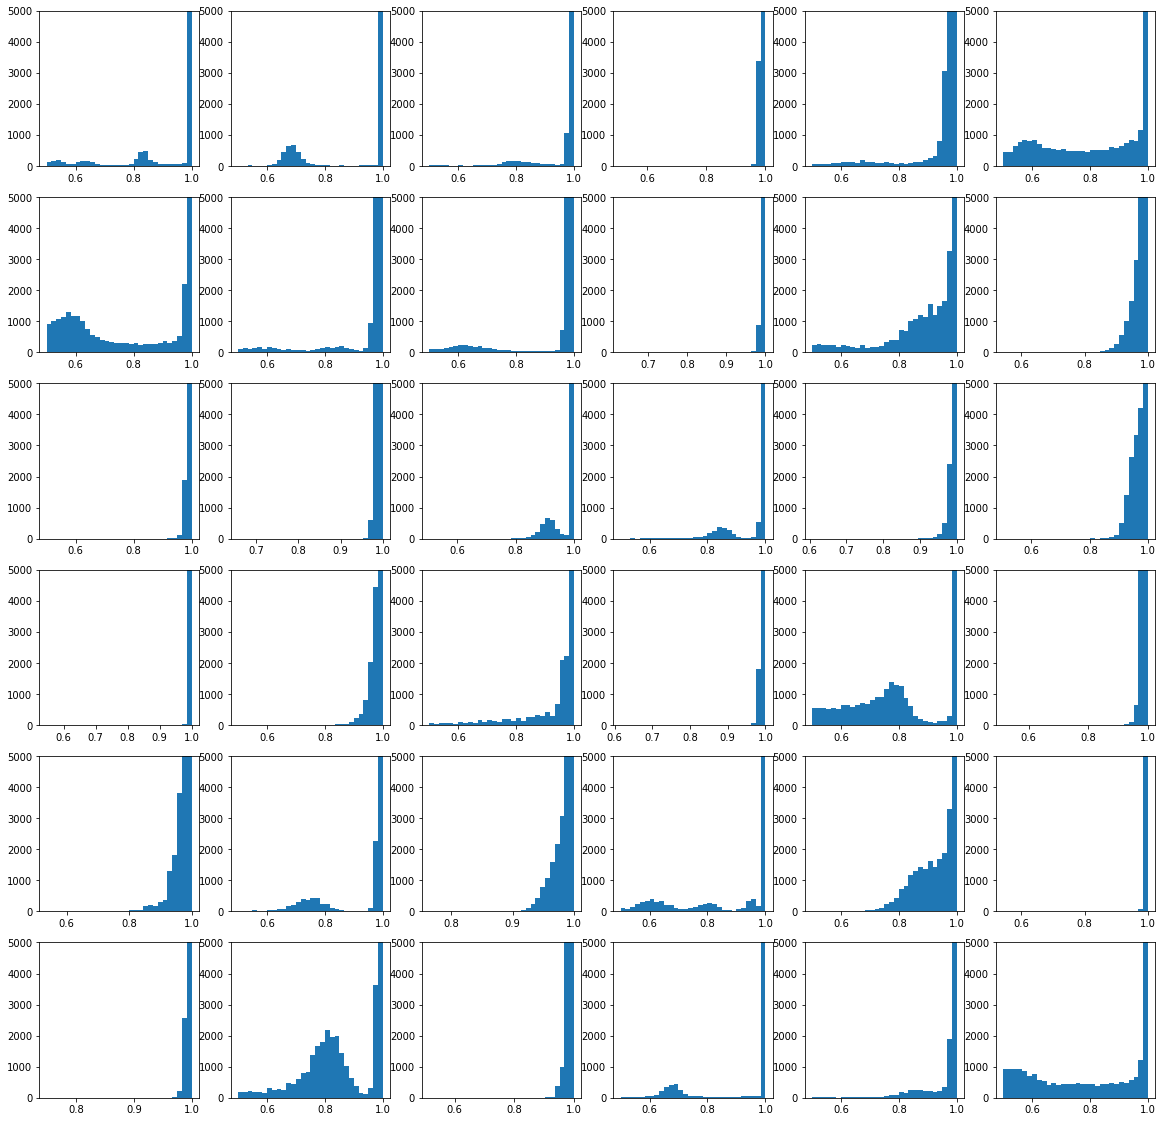

In [13]:
fig, ax = plt.subplots(6, 6, figsize=(20, 20))

x = 0; y = 0
for i in range(36*3, 36*4):
    sfs_map = sfs_maps[samples[i]]
    major_freqs = []
    for key in sfs_map.keys():
        D,A = key
        n = sfs_map[key][0]

        alt_freq = A/float(D)
        major_freq = (1-alt_freq) if alt_freq < 0.5 else alt_freq
        major_freqs += ([major_freq]*n)
    
    ax[x][y].hist(major_freqs, bins=30)
    ax[x][y].set_ylim((0, 5000))
    x += 1
    if x == 6:
        y += 1
        x = 0

plt.show()